# Import data

In [2]:
import pandas as pd
import numpy as np

In [3]:
x_train = pd.read_parquet("train_processed.parquet")
x_valid = pd.read_parquet("valid_processed.parquet")
x_test = pd.read_parquet("test_processed.parquet")

In [4]:
y_train = pd.read_parquet("scaled_y_train.parquet")
y_valid = pd.read_parquet("scaled_y_valid.parquet")
y_test = pd.read_parquet("scaled_y_test.parquet")

In [5]:
from sklearn.decomposition import PCA

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Variation 90%
pca = PCA()


In [19]:
principleComponent = pca.fit(x_train)

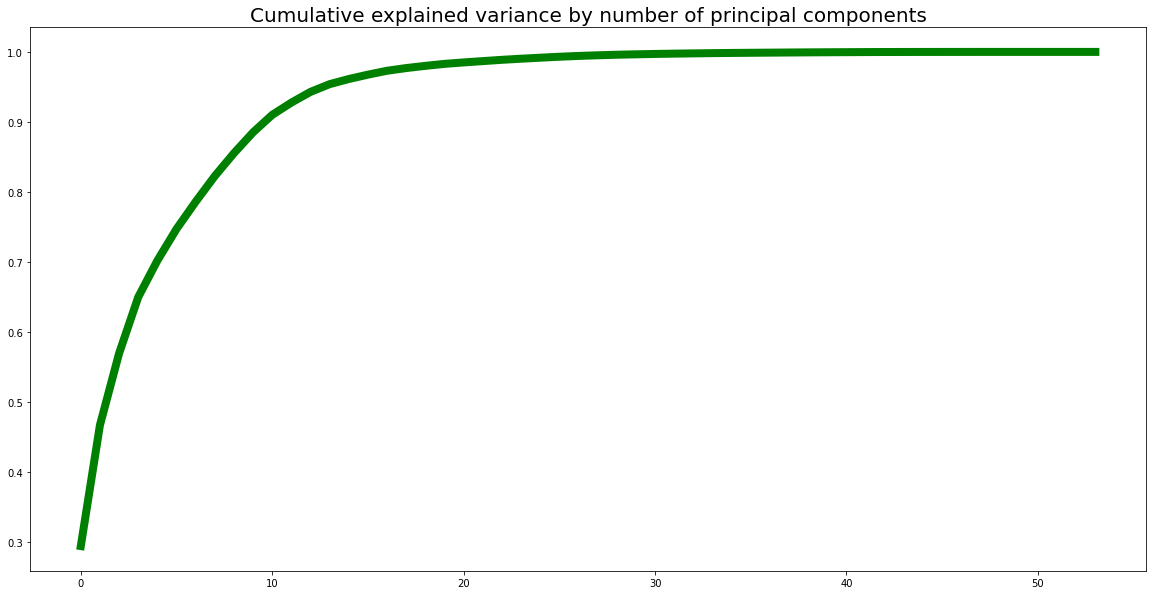

In [23]:
plt.figure(figsize=(20,10))
plt.plot(principleComponent.explained_variance_ratio_.cumsum(), lw=8, color="Green")
plt.title("Cumulative explained variance by number of principal components", size=20)
plt.show()

In [47]:
pca = PCA(0.95)

In [48]:
pca.fit(x_train)

PCA(n_components=0.95)

In [49]:
print(pca.explained_variance_ratio_)

[0.29408731 0.1728229  0.10247995 0.08035967 0.05216764 0.04516105
 0.03886991 0.0367094  0.03265886 0.02983092 0.02493215 0.01751721
 0.01529909 0.01105435]


In [50]:
principleComponent = pca.transform(x_train)

In [51]:
pcomponent = pd.DataFrame(principleComponent)

In [52]:
pcomponent.shape

(53402, 14)

In [53]:
pcomponent.to_pickle('x_train_pca.pickle')

In [54]:
x_valid_PCA = pca.transform(x_valid)
x_test_PCA = pca.transform(x_test)

In [55]:
x_valid_pca = pd.DataFrame(x_valid_PCA)
x_test_pca = pd.DataFrame(x_test_PCA)

In [56]:
x_test_pca.shape

(11088, 14)

In [57]:
x_valid_pca.to_pickle('x_valid_pca.pickle')
x_test_pca.to_pickle('x_test_pca.pickle')